# Recommendation Systems

There are many ways to recommend items to users. There are two primary types of recommendation systems, each with different sub-types. The two primary types are **content-based** and **collaborative filtering**.


## Collaborative Filtering

It primarily makes recommendations based on inputs or actions from other people.

```{image} https://miro.medium.com/v2/resize:fit:1400/format:jpg/1*DqKuqlvMREPH18ccbs5hmg.png
:alt: Collaborative Filtering
:width: 80%
:align: center
```

- Ignore User and Item Attributes
- Focus on User-Item Interactions
- Pure Behavior-Based Recommendation

Variations on this type of recommendation system include:

**Key Concepts**

- Nearest Neighbor Collaborative Filtering
- User-User CF Algorithm
    - Neighborhoods and Tuning Parameters
    - Alternatives to Historic Agreement (social, trust)
- Item-Item CF Algorithm
    - Dealing with Unary Data
    - Hybrids and Extensions
    - Practical Implications

### User-User Collaborative Filtering

This strategy involves creating user groups by comparing users’ activities and providing recommendations that are popular among other members of the group. It is useful on sites with a strong but versatile audience to quickly provide recommendations for a user on which little information is available.

Find users similar to you and recommend what they like.

#### Excerise: Movie Recommendations

This is a 25 user x 100 movie matrix of ratings selected from the class data set. 
Rows are movies ratings, columns are users, and cells are ratings from 1 to 5.


In [1]:
import pandas as pd
import torch
import seaborn
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('https://github.com/akkefa/ml-notes/releases/download/v0.1.0/recommendation_systems_movies_ratings_data.csv')

In [3]:
df.head()

,Unnamed: 0,1648,5136,918,2824,3867,860,3712,2968,3525,...,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
0,11: Star Wars: Episode IV - A New Hope (1977),NaN,4.5,5.0,4.5,4.0,4.0,NaN,5.0,4.0,...,4.0,NaN,4.5,4.0,3.5,NaN,NaN,NaN,NaN,NaN
1,12: Finding Nemo (2003),NaN,5.0,5.0,NaN,4.0,4.0,4.5,4.5,4.0,...,4.0,NaN,3.5,4.0,2.0,3.5,NaN,NaN,NaN,3.5
2,13: Forrest Gump (1994),NaN,5.0,4.5,5.0,4.5,4.5,NaN,5.0,4.5,...,4.0,5.0,3.5,4.5,4.5,4.0,3.5,4.5,3.5,3.5
3,14: American Beauty (1999),NaN,4.0,NaN,NaN,NaN,NaN,4.5,2.0,3.5,...,4.0,NaN,3.5,4.5,3.5,4.0,NaN,3.5,NaN,NaN
4,22: Pirates of the Caribbean: The Curse of the...,4.0,5.0,3.0,4.5,4.0,2.5,NaN,5.0,3.0,...,3.0,1.5,4.0,4.0,2.5,3.5,NaN,5.0,NaN,3.5


In [4]:
tmp_df = df.copy()


In [5]:
# Drop the first column (movie title)
tmp_df.drop(columns=tmp_df.columns[0], axis=1, inplace=True)

In [6]:
tmp_df.head()

,1648,5136,918,2824,3867,860,3712,2968,3525,4323,...,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
0,NaN,4.5,5.0,4.5,4.0,4.0,NaN,5.0,4.0,5.0,...,4.0,NaN,4.5,4.0,3.5,NaN,NaN,NaN,NaN,NaN
1,NaN,5.0,5.0,NaN,4.0,4.0,4.5,4.5,4.0,5.0,...,4.0,NaN,3.5,4.0,2.0,3.5,NaN,NaN,NaN,3.5
2,NaN,5.0,4.5,5.0,4.5,4.5,NaN,5.0,4.5,5.0,...,4.0,5.0,3.5,4.5,4.5,4.0,3.5,4.5,3.5,3.5
3,NaN,4.0,NaN,NaN,NaN,NaN,4.5,2.0,3.5,5.0,...,4.0,NaN,3.5,4.5,3.5,4.0,NaN,3.5,NaN,NaN
4,4.0,5.0,3.0,4.5,4.0,2.5,NaN,5.0,3.0,4.0,...,3.0,1.5,4.0,4.0,2.5,3.5,NaN,5.0,NaN,3.5


Given a set of items $I$, and a set of users $U$, and a sparse matrix of ratings $R$,
We compute the prediction $s(\mathrm{u}, \mathrm{i})$ as follows:
- For all users $v \neq u$, compute $w_{u v}$
- similarity metric (e.g., Pearson correlation)
- Select a neighborhood of users $V \subset U$ with highest $w_{u v}$
- may limit neighborhood to top-k neighbors
- may limit neighborhood to sim > sim_threshold
- may use sim or |sim| (risks of negative correlations)
- may limit neighborhood to people who rated i (if single-use)

$$
s(u, i)=\bar{r}_u+\frac{\sum_{v \in V}\left(r_{v i}-\bar{r}_v\right) * w_{u v}}{\sum_{v \in V} w_{u v}}
$$

Computing the person correlation coefficient between each pair of users.
Pearson correlation coefficient formula:

$$
r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$

where $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$ respectively.





In [7]:
corr_df = tmp_df.corr()
corr_df

,1648,5136,918,2824,3867,860,3712,2968,3525,4323,...,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
1648,1.000000,0.402980,-0.142206,0.517620,0.300200,0.480537,-0.312412,0.383348,0.092775,0.098191,...,-0.191988,0.493008,0.360644,0.551089,0.002544,0.116653,-0.429183,0.394371,-0.304422,0.245048
5136,0.402980,1.000000,0.118979,0.057916,0.341734,0.241377,0.131398,0.206695,0.360056,0.033642,...,0.488607,0.328120,0.422236,0.226635,0.305803,0.037769,0.240728,0.411676,0.189234,0.390067
918,-0.142206,0.118979,1.000000,-0.317063,0.294558,0.468333,0.092037,-0.045854,0.367568,-0.035394,...,0.373226,0.470972,0.069956,-0.054762,0.133812,0.015169,-0.273096,0.082528,0.667168,0.119162
2824,0.517620,0.057916,-0.317063,1.000000,-0.060913,-0.008066,0.462910,0.214760,0.169907,0.119350,...,-0.201275,0.228341,0.238700,0.259660,0.247097,0.149247,-0.361466,0.474974,-0.262073,0.166999
3867,0.300200,0.341734,0.294558,-0.060913,1.000000,0.282497,0.400275,0.264249,0.125193,-0.333602,...,0.174085,0.297977,0.476683,0.293868,0.438992,-0.162818,-0.295966,0.054518,0.464110,0.379856
860,0.480537,0.241377,0.468333,-0.008066,0.282497,1.000000,0.171151,0.072927,0.387133,0.146158,...,0.347470,0.399436,0.207314,0.311363,0.276306,0.079698,0.212991,0.165608,0.162314,0.279677
3712,-0.312412,0.131398,0.092037,0.462910,0.400275,0.171151,1.000000,0.065015,0.095623,-0.292501,...,0.016406,-0.240764,-0.115254,0.247693,0.166913,0.146011,0.009685,-0.451625,0.193660,0.113266
2968,0.383348,0.206695,-0.045854,0.214760,0.264249,0.072927,0.065015,1.000000,0.028529,-0.073252,...,0.049132,-0.009041,0.203613,0.033301,0.137982,0.070602,0.109452,-0.083562,-0.089317,0.229219
3525,0.092775,0.360056,0.367568,0.169907,0.125193,0.387133,0.095623,0.028529,1.000000,0.210879,...,0.475711,0.306957,0.136343,0.301750,0.143414,0.056100,0.179908,0.284648,0.170757,0.193131
4323,0.098191,0.033642,-0.035394,0.119350,-0.333602,0.146158,-0.292501,-0.073252,0.210879,1.000000,...,-0.040606,0.155045,-0.204164,0.263654,0.167198,-0.084592,0.315712,0.085673,-0.109892,-0.279385


<Axes: >

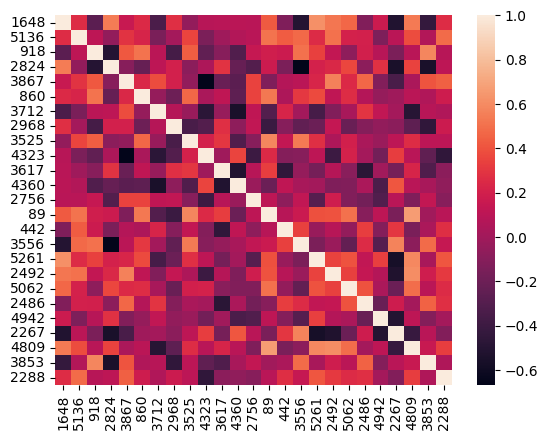

In [8]:
seaborn.heatmap(corr_df.corr())

In [9]:
corr_df["3867"].sort_values(ascending=False)

3867    1.000000
2492    0.476683
3853    0.464110
2486    0.438992
3712    0.400275
2288    0.379856
5136    0.341734
2756    0.310104
1648    0.300200
5261    0.297977
918     0.294558
5062    0.293868
860     0.282497
2968    0.264249
3556    0.174085
3525    0.125193
442     0.113581
4809    0.054518
89     -0.003878
2824   -0.060913
3617   -0.066576
4360   -0.093801
4942   -0.162818
2267   -0.295966
4323   -0.333602
Name: 3867, dtype: float64

In [10]:
corr_df["89"].sort_values(ascending=False)

89      1.000000
4809    0.668516
5136    0.562449
860     0.539066
5062    0.525990
3525    0.475495
1648    0.464610
2492    0.372676
3556    0.326774
442     0.296826
5261    0.291476
2756    0.290591
3617    0.278335
918     0.267029
4323    0.258866
2824    0.241567
3853    0.179680
4942    0.178088
2288    0.155869
2486    0.123380
2267    0.088600
3867   -0.003878
3712   -0.051320
4360   -0.115492
2968   -0.118085
Name: 89, dtype: float64

Compute the predictions for each movie for users 3867 and 89 by taking the correlation-weighted average of the ratings of the top-five neighbors (for each target user) for each movie. The formal formula for correlation-weighted average is

$$
\hat{x}_{u,i} = \frac{\sum_{v \in N}r_{u,v}x_{v,i}}{\sum_{v \in N}|r_{u,v}|}
$$

where $N$ is the set of the top-five neighbors of user $u$ and $x_{v,i}$ is the rating of user $v$ for movie $i$.

In [11]:
def get_top_users(df_corr,target,n=5):
    target_cor = df_corr.loc[target]
    top_neighbors = target_cor.nlargest(n+1).iloc[1:]
    return top_neighbors

def get_user_movie_score(movie,user):
    neighbors = get_top_users(corr_df,str(user))
    rating_sum = 0
    weight_sum = 0
    for user,w in zip(neighbors.index,neighbors.values):
        if np.isnan(movie[user]):
            continue
        rating_sum += movie[user] * w
        weight_sum += w
    if weight_sum == 0:
        return 0
    else:
        return rating_sum/weight_sum

In [12]:
get_top_users(corr_df,"3867")

2492    0.476683
3853    0.464110
2486    0.438992
3712    0.400275
2288    0.379856
Name: 3867, dtype: float64

In [13]:
get_top_users(corr_df,"3712")

2824    0.462910
3867    0.400275
5062    0.247693
442     0.227130
3853    0.193660
Name: 3712, dtype: float64

In [14]:
pred_3867 = df.apply(get_user_movie_score,axis=1,args=(3867,))
pred_89 = df.apply(get_user_movie_score,axis=1,args=(89,))

In [15]:
pred_3867.sort_values(ascending=False)[:3]

77    4.760291
21    4.551454
16    4.507637
dtype: float64

In [16]:
for i in pred_3867.sort_values(ascending=False)[:5].index:
    print(df.loc[i][0])

1891: Star Wars: Episode V - The Empire Strikes Back (1980)
155: The Dark Knight (2008)
122: The Lord of the Rings: The Return of the King (2003)
77: Memento (2000)
121: The Lord of the Rings: The Two Towers (2002)


In [17]:
for i in pred_89.sort_values(ascending=False)[:5].index:
    print(df.loc[i][0])

238: The Godfather (1972)
278: The Shawshank Redemption (1994)
807: Seven (a.k.a. Se7en) (1995)
275: Fargo (1996)
424: Schindler's List (1993)


##### Normalization


In [18]:
def get_norm_user_movie_score(movie,user):
    user = str(user)
    neighbors = get_top_users(corr_df,str(user))
    rating_sum = 0
    weight_sum = 0
    user_rating_mean = df.loc[:,user].mean()
    for user,w in zip(neighbors.index,neighbors.values):
        if np.isnan(movie[user]):
            continue
        movie_user_mean = df.loc[:,user].mean()
        rating_sum += (movie[user]-movie_user_mean) * w
        weight_sum += w
    if weight_sum == 0:
        return 0
    else:
        return user_rating_mean + rating_sum/weight_sum  
    

In [19]:
norm_pred_3867 = df.apply(get_norm_user_movie_score,axis=1,args=(3867,))
norm_pred_89 = df.apply(get_norm_user_movie_score,axis=1,args=(89,))

In [20]:
for i in norm_pred_3867.sort_values(ascending=False)[:5].index:
    print(df.loc[i][0])

1891: Star Wars: Episode V - The Empire Strikes Back (1980)
155: The Dark Knight (2008)
77: Memento (2000)
275: Fargo (1996)
807: Seven (a.k.a. Se7en) (1995)


Problem in User - User Collaborative Filtering:

Issues of Sparsity
    – With large item sets, small numbers of ratings, too
    often there are points where no recommendation
    can be made (for a user, for an item to a set of
    users, etc.)
    – Many solutions proposed here, including
    “filterbots”, item‐item, and dimensionality
    reduction

Computational performance
    – With millions of users (or more), computing all‐
    pairs correlations is expensive
    – Even incremental approaches were expensive
    – And user profiles could change quickly – needed
    to compute in real time to keep users happy

### Item-Item Collaborative Filtering

Item‐Item similarity is fairly stable.

- This is dependent on having many more usersthan items
  - Average item has many more ratings than an average user
  - Intuitively, items don’t generally change rapidly – at least not in ratings space (special case for time‐bound items)
- Item similarity is a route to computing a prediction of a user’s item preference


https://github.com/shenweichen/Coursera/blob/master/Specialization_Recommender_System_University_of_Minnesota/Course2_Nearest_Neighbor_Collaborative_Filtering/Item%20Based%20Assignment.ipynb


In [57]:
data = pd.read_excel("https://github.com/akkefa/ml-notes/releases/download/v0.1.0/item_item_cb.xls", sheet_name=0)

In [58]:
data = data.fillna(0)

In [59]:
data.head()

,User,1: Toy Story (1995),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),260: Star Wars: Episode IV - A New Hope (1977),2028: Saving Private Ryan (1998),296: Pulp Fiction (1994),...,2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995),Mean
0,755,2.0,5.0,2.0,0.0,4.0,4.0,1.0,2.0,0.0,...,0.0,5.0,2.0,5.0,4.0,2.0,5.0,0.0,0.0,3.200000
1,5277,1.0,0.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0,...,2.0,2.0,0.0,2.0,0.0,5.0,1.0,3.0,0.0,2.769231
2,1577,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,...,1.0,4.0,4.0,1.0,1.0,2.0,3.0,1.0,3.0,2.333333
3,4388,2.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,...,4.0,0.0,3.0,5.0,0.0,5.0,1.0,1.0,2.0,2.833333
4,1202,0.0,3.0,4.0,1.0,4.0,1.0,4.0,4.0,0.0,...,1.0,0.0,4.0,0.0,3.0,5.0,5.0,0.0,0.0,3.214286


In [61]:
matrix = pd.read_excel('https://github.com/akkefa/ml-notes/releases/download/v0.1.0/item_item_cb.xls',sheet_name=2)

In [62]:
matrix.head()

,Unnamed: 0,1: Toy Story (1995),1210: Star Wars: Episode VI - Return of the Jedi (1983),356: Forrest Gump (1994),"318: Shawshank Redemption, The (1994)","593: Silence of the Lambs, The (1991)",3578: Gladiator (2000),260: Star Wars: Episode IV - A New Hope (1977),2028: Saving Private Ryan (1998),296: Pulp Fiction (1994),...,2396: Shakespeare in Love (1998),2916: Total Recall (1990),780: Independence Day (ID4) (1996),541: Blade Runner (1982),1265: Groundhog Day (1993),"2571: Matrix, The (1999)",527: Schindler's List (1993),"2762: Sixth Sense, The (1999)",1198: Raiders of the Lost Ark (1981),34: Babe (1995)
0,1: Toy Story (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1210: Star Wars: Episode VI - Return of the Je...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,356: Forrest Gump (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"318: Shawshank Redemption, The (1994)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"593: Silence of the Lambs, The (1991)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
matrix = pd.DataFrame(cosine_similarity(data.values[:-1,1:-1].T),index=matrix.index,columns=matrix.columns[1:])

In [68]:
matrix = matrix.applymap(lambda x:max(0,x))

In [69]:
matrix.columns


Index(['1: Toy Story (1995)',
       '1210: Star Wars: Episode VI - Return of the Jedi (1983)',
       '356: Forrest Gump (1994)', '318: Shawshank Redemption, The (1994)',
       '593: Silence of the Lambs, The (1991)', '3578: Gladiator (2000)',
       '260: Star Wars: Episode IV - A New Hope (1977)',
       '2028: Saving Private Ryan (1998)', '296: Pulp Fiction (1994)',
       '1259: Stand by Me (1986)', '2396: Shakespeare in Love (1998)',
       '2916: Total Recall (1990)', '780: Independence Day (ID4) (1996)',
       '541: Blade Runner (1982)', '1265: Groundhog Day (1993)',
       '2571: Matrix, The (1999)', '527: Schindler's List (1993)',
       '2762: Sixth Sense, The (1999)', '1198: Raiders of the Lost Ark (1981)',
       '34: Babe (1995)'],
      dtype='object')

In [70]:
matrix.iloc[0].nlargest(6).iloc[1:]

260: Star Wars: Episode IV - A New Hope (1977)    0.747409
780: Independence Day (ID4) (1996)                0.690665
296: Pulp Fiction (1994)                          0.667846
318: Shawshank Redemption, The (1994)             0.667424
1265: Groundhog Day (1993)                        0.661016
Name: 0, dtype: float64

In [48]:
def get_score(row,user):
    user_rating = data.loc[(data.User==user)]
    user_hist_item = user_rating.columns[pd.notnull(user_rating).values[0]]
    movie_name = row.name

    neighbor_names = user_hist_item.tolist()#row.index.tolist()

    if 'User' in neighbor_names:
        neighbor_names.remove('User')
    if 'Mean' in neighbor_names:
        neighbor_names.remove('Mean')
    a = row.loc[neighbor_names].values
    b = data.loc[data.User==user,neighbor_names]

    return np.dot(a,b.values[0])/np.sum(a) 

In [49]:
user_rating = data.loc[data.User==5277]

In [53]:
idx = user_rating.columns[pd.notnull(user_rating).values[0]].tolist()
idx.remove('User')
idx.remove('Mean')

idx

['1: Toy Story (1995)',
 '1210: Star Wars: Episode VI - Return of the Jedi (1983)',
 '356: Forrest Gump (1994)',
 '318: Shawshank Redemption, The (1994)',
 '593: Silence of the Lambs, The (1991)',
 '3578: Gladiator (2000)',
 '260: Star Wars: Episode IV - A New Hope (1977)',
 '2028: Saving Private Ryan (1998)',
 '296: Pulp Fiction (1994)',
 '1259: Stand by Me (1986)',
 '2396: Shakespeare in Love (1998)',
 '2916: Total Recall (1990)',
 '780: Independence Day (ID4) (1996)',
 '541: Blade Runner (1982)',
 '1265: Groundhog Day (1993)',
 '2571: Matrix, The (1999)',
 "527: Schindler's List (1993)",
 '2762: Sixth Sense, The (1999)',
 '1198: Raiders of the Lost Ark (1981)',
 '34: Babe (1995)']

In [71]:
ans = matrix.apply(get_score,axis=1,args=(5277,))

## Content-Based 